Import Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV  # Ensure this line is present and correct
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Load the Dataset

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')


Explore the Dataset

In [3]:
print(df.head())


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


Handle Missing Values

In [4]:
print(df.isnull().sum())  # Check for missing values
df = df.dropna()  # Drop missing values or use imputation as appropriate


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Encode Categorical Features

In [5]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)


In [6]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})


In [7]:
print(df['cb_person_default_on_file'].unique())  # It should print [1 0]


[1 0]


Split Data

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np

param_dist = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), 'kernel': ['rbf']}

# Using fewer iterations and all CPU cores
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, cv=5, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Inte

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'kernel': ['rbf']},
                   verbose=2)

Normalize Data

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Create a Sequential model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


2023-10-04 03:04:33.093592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Build the Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Train the Model

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
716/716 [==============================] - 1s 989us/step - loss: 0.3463 - accuracy: 0.8656 - val_loss: 0.3051 - val_accuracy: 0.8888
Epoch 2/50
716/716 [==============================] - 1s 867us/step - loss: 0.2894 - accuracy: 0.8961 - val_loss: 0.2923 - val_accuracy: 0.8958
Epoch 3/50
716/716 [==============================] - 1s 977us/step - loss: 0.2739 - accuracy: 0.9044 - val_loss: 0.2769 - val_accuracy: 0.9045
Epoch 4/50
716/716 [==============================] - 1s 863us/step - loss: 0.2623 - accuracy: 0.9074 - val_loss: 0.2718 - val_accuracy: 0.8998
Epoch 5/50
716/716 [==============================] - 1s 805us/step - loss: 0.2543 - accuracy: 0.9123 - val_loss: 0.2608 - val_accuracy: 0.9076
Epoch 6/50
716/716 [==============================] - 1s 802us/step - loss: 0.2467 - accuracy: 0.9151 - val_loss: 0.2574 - val_accuracy: 0.9111
Epoch 7/50
716/716 [==============================] - 1s 802us/step - loss: 0.2414 - accuracy: 0.9178 - val_loss: 0.2540 - val_accuracy:

Evaluate the Model

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

179/179 [==============================] - 0s 485us/step - loss: 0.2496 - accuracy: 0.9166
Accuracy: 91.66%


Confusion Matrix and Classification Report

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # convert probabilities to binary output

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)


179/179 [==============================] - 0s 451us/step
Confusion Matrix:
[[4377   66]
 [ 412  873]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4443
           1       0.93      0.68      0.79      1285

    accuracy                           0.92      5728
   macro avg       0.92      0.83      0.87      5728
weighted avg       0.92      0.92      0.91      5728



Feature Engineering

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


Ensemble Modeling

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_poly, y_train)

# Predictions and Evaluation
rf_predictions = rf_model.predict(X_test_poly)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Model Accuracy: {rf_accuracy*100:.2f}%")


Random Forest Model Accuracy: 93.52%


In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, rf_predictions)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[4419   24]
 [ 347  938]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4443
           1       0.98      0.73      0.83      1285

    accuracy                           0.94      5728
   macro avg       0.95      0.86      0.90      5728
weighted avg       0.94      0.94      0.93      5728



In [19]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [20]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[CV] END .....................C=1.0, gamma=0.001, kernel=rbf; total time=  47.6s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time= 1.3min
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=  27.1s
[CV] END .....................C=0.001, gamma=1.0, kernel=rbf; total time=  18.6s
[CV] END .....................C=10.0, gamma=10.0, kernel=rbf; total time= 1.3min
[CV] END .....................C=1.0, gamma=0.001, kernel=rbf; total time=  45.7s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time= 1.4min
[CV] END ....................C=0.01, gamma=0.001, kernel=rbf; total time=  26.4s
[CV] END .....................C=10.0, gamma=10.0, kernel=rbf; total time= 1.3min
[CV] END .....................C=0.01, gamma=10.0, kernel=rbf; total time=  33.6s
[CV] END .....................C=1.0, gamma=0.001, kernel=rbf; total time=  41.7s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  37.3s
[CV] END ...................

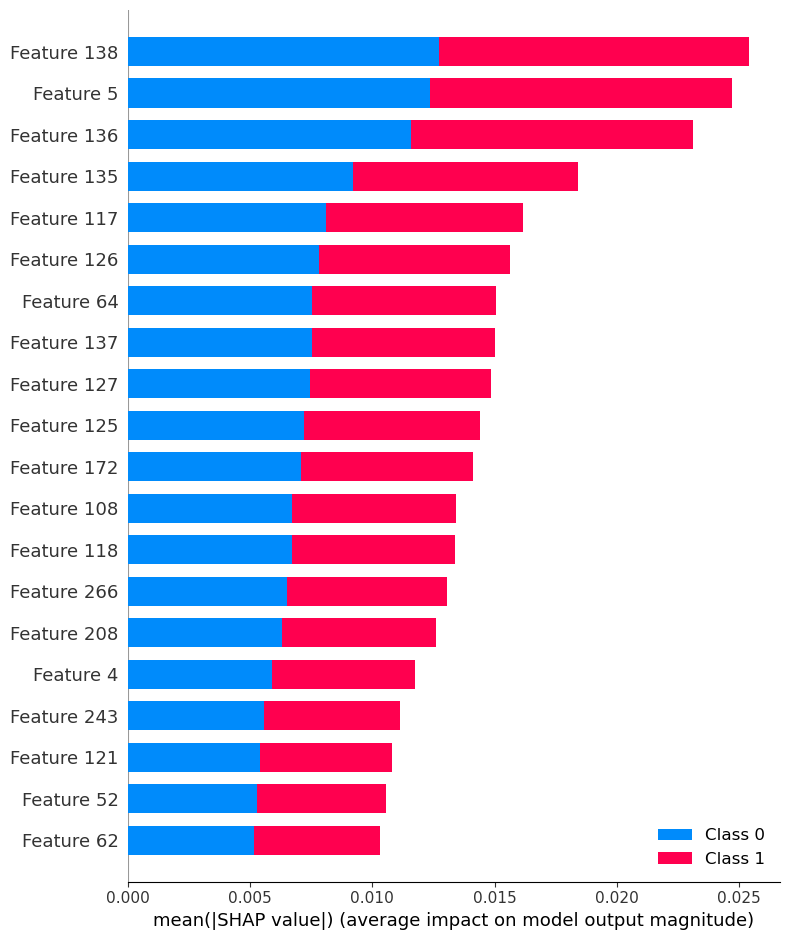


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4443
           1       0.98      0.73      0.83      1285

    accuracy                           0.94      5728
   macro avg       0.95      0.86      0.90      5728
weighted avg       0.94      0.94      0.93      5728

[CV] END ...................C=0.001, gamma=100.0, kernel=rbf; total time=  22.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  42.9s
[CV] END ....................C=10.0, gamma=100.0, kernel=rbf; total time= 1.4min
[CV] END .....................C=0.001, gamma=1.0, kernel=rbf; total time=  19.8s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time= 1.0min
[CV] END .....................C=0.01, gamma=10.0, kernel=rbf; total time=  36.9s
[CV] END ...................C=0.001, gamma=100.0, kernel=rbf; total time=  21.1s
[CV] END ...................C=0.001, gamma=100.0, kernel=rbf; total time=  20.0s
[

In [21]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_poly)

# Plot summary_plot
shap.summary_plot(shap_values, X_test_poly, plot_type="bar")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))